In [684]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [685]:
import warnings
warnings.filterwarnings("ignore")

## Notes
Some Key Details
- Suburb: Suburb
- Address: Address
- Rooms: Number of rooms
- Price: Price in Australian dollars
- Method:
   - S - property sold;
   - SP - property sold prior;
   - PI - property passed in;
   - PN - sold prior not disclosed;
   - SN - sold not disclosed;
   - NB - no bid;
   - VB - vendor bid;
   - W - withdrawn prior to auction;
   - SA - sold after auction;
   - SS - sold after auction price not disclosed.
   - N/A - price or highest bid not available.
- Type:
   - br - bedroom(s);
   - h - house,cottage,villa, semi,terrace;
   - u - unit, duplex;
   - t - townhouse;
   - dev site - development site;
   - o res - other residential.
- SellerG: Real Estate Agent
- Date: Date sold
- Distance: Distance from CBD in Kilometres
- Regionname: General Region (West, North West, North, North east …etc)
- Propertycount: Number of properties that exist in the suburb.
- Bedroom2 : Scraped # of Bedrooms (from different source)
- Bathroom: Number of Bathrooms
- Car: Number of carspots
- Landsize: Land Size in Metres
- BuildingArea: Building Size in Metres
- YearBuilt: Year the house was built
- CouncilArea: Governing council for the area
- Lattitude: Self explanitory
- Longtitude: Self explanitory

In [686]:
df = pd.read_csv("datasets/melbourne_housing_market/melbourne_housing_market_full.csv")
backup_df = df.copy()

df.head().T

,0,1,2,3,4
Suburb,Abbotsford,Abbotsford,Abbotsford,Abbotsford,Abbotsford
Address,68 Studley St,85 Turner St,25 Bloomburg St,18/659 Victoria St,5 Charles St
Rooms,2,2,2,3,3
Type,h,h,h,u,h
Price,NaN,1.48e+06,1.035e+06,NaN,1.465e+06
Method,SS,S,S,VB,SP
SellerG,Jellis,Biggin,Biggin,Rounds,Biggin
Date,3/09/2016,3/12/2016,4/02/2016,4/02/2016,4/03/2017
Distance,2.5,2.5,2.5,2.5,2.5
Postcode,3067,3067,3067,3067,3067


In [687]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,34857,351,Reservoir,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,34857,34009,5 Charles St,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,34857,NaN,NaN,NaN,3.03101,0.969933,1,2,3,4,16
Type,34857,3,h,23980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,27247,NaN,NaN,NaN,1.05017e+06,641467,85000,635000,870000,1.295e+06,1.12e+07
Method,34857,9,S,19744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,34857,388,Jellis,3359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,34857,78,28/10/2017,1119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,34856,NaN,NaN,NaN,11.1849,6.78889,0,6.4,10.3,14,48.1
Postcode,34856,NaN,NaN,NaN,3116.06,109.024,3000,3051,3103,3156,3978


In [688]:
print(f"Total rows: {len(df)}")
print("-------")
print("Missing values")

def find_missing_values(df, column):
    print(f"{column.ljust(15, ' ')}: {df[column].isnull().sum()}")
    
for column in sorted(list(df.columns)):
    find_missing_values(df, column)

Total rows: 34857
-------
Missing values
Address        : 0
Bathroom       : 8226
Bedroom2       : 8217
BuildingArea   : 21115
Car            : 8728
CouncilArea    : 3
Date           : 0
Distance       : 1
Landsize       : 11810
Lattitude      : 7976
Longtitude     : 7976
Method         : 0
Postcode       : 1
Price          : 7610
Propertycount  : 3
Regionname     : 3
Rooms          : 0
SellerG        : 0
Suburb         : 0
Type           : 0
YearBuilt      : 19306


Total houses have more than 5 rooms: 269 (0.7717244742806323%)


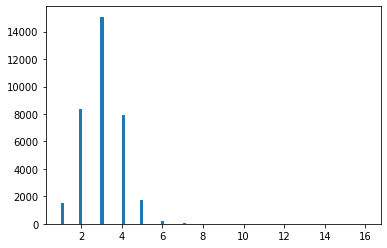

In [689]:
plt.hist(df["Rooms"], 100);

# There are a few houses having rooms greater than 5, which is likely contribute to the noise
room_limit = 5
total_house_above_limit = (df["Rooms"] > room_limit).sum()
print(f"Total houses have more than {room_limit} rooms: {total_house_above_limit} ({total_house_above_limit / len(df) * 100}%)")

Total houses have more than 5 bedrooms: 224 (0.6426255845310842%)


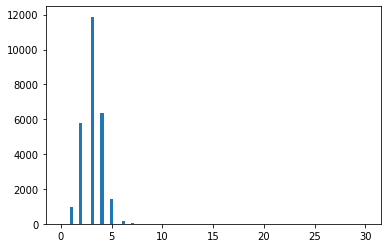

In [690]:
plt.hist(df["Bedroom2"], 100);

bedroom_limit = 5
total_house_above_limit = (df["Bedroom2"] > bedroom_limit).sum()
print(f"Total houses have more than {bedroom_limit} bedrooms: {total_house_above_limit} ({total_house_above_limit / len(df) * 100}%)")

Total houses have more than 3 bathrooms: 371 (1.064348624379608%)


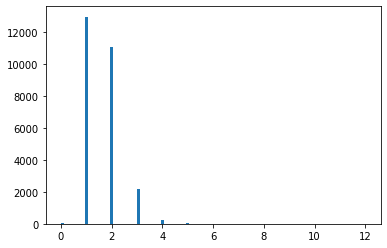

In [691]:
plt.hist(df["Bathroom"], 100);

bathroom_limit = 3
total_house_above_limit = (df["Bathroom"] > bathroom_limit).sum()
print(f"Total houses have more than {bathroom_limit} bathrooms: {total_house_above_limit} ({total_house_above_limit / len(df) * 100}%)")

Total houses built not in the range of [1800, 2020]: 2 (0.005737728433313252%)


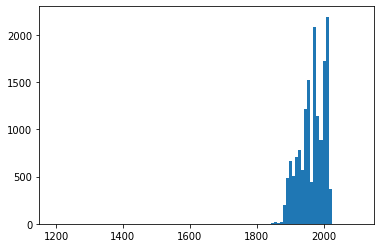

In [692]:
plt.hist(df["YearBuilt"], 100);

year_built_limit = [1800, 2020]
total_house_above_limit = len(df[(df["YearBuilt"] < year_built_limit[0]) | (df["YearBuilt"] > year_built_limit[1])])
print(f"Total houses built not in the range of {year_built_limit}: {total_house_above_limit} ({total_house_above_limit / len(df) * 100}%)")

Total houses have more than 4 cars: 353 (1.0127090684797888%)


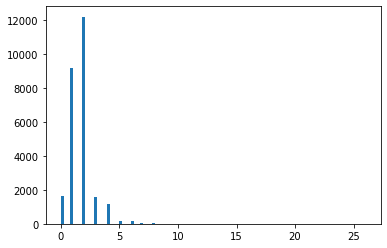

In [693]:
plt.hist(df["Car"], 100);

car_limit = 4
total_house_above_limit = (df["Car"] > car_limit).sum()
print(f"Total houses have more than {car_limit} cars: {total_house_above_limit} ({total_house_above_limit / len(df) * 100}%)")

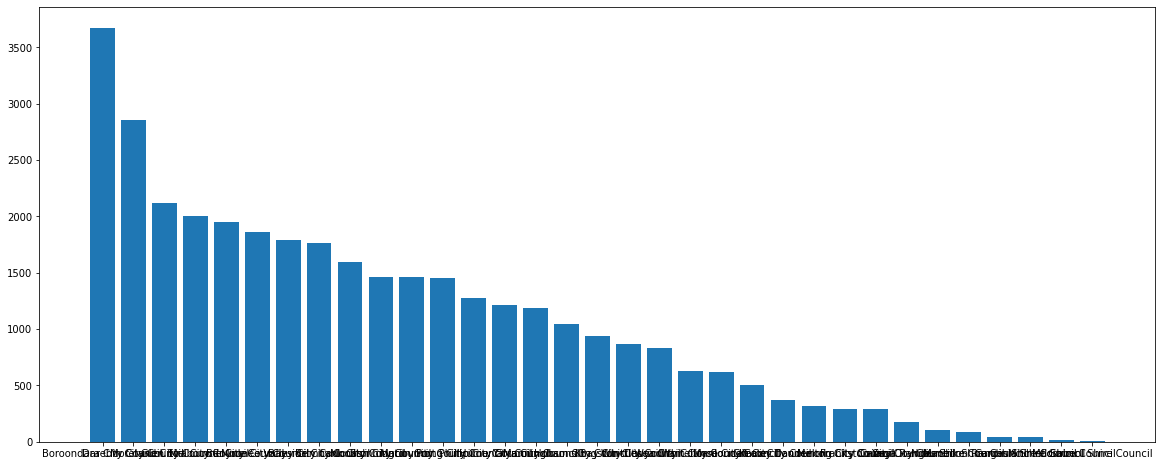

In [694]:
council_area = df["CouncilArea"].value_counts()

fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.bar(council_area.index, council_area.values);

Total houses have landsize more than 2000m2: 361 (1.035659982213042%)


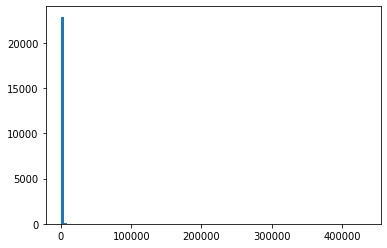

In [695]:
plt.hist(df["Landsize"], 100);

landsize_limit = 2000
total_house_above_limit = (df["Landsize"] > landsize_limit).sum()
print(f"Total houses have landsize more than {landsize_limit}m2: {total_house_above_limit} ({total_house_above_limit / len(df) * 100}%)")
# "Price",
# "Car",
# "CouncilArea",

Total houses have distance more than 35km: 425 (1.219267292079066%)


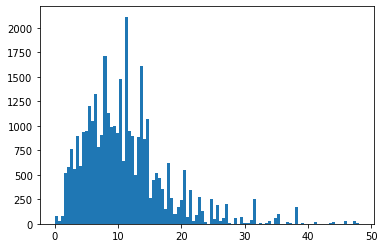

In [696]:
plt.hist(df["Distance"], 100);

distance_limit = 35
total_house_above_limit = (df["Distance"] > distance_limit).sum()
print(f"Total houses have distance more than {distance_limit}km: {total_house_above_limit} ({total_house_above_limit / len(df) * 100}%)")

Total houses have distance more than 20000km: 844 (2.421321398858192%)


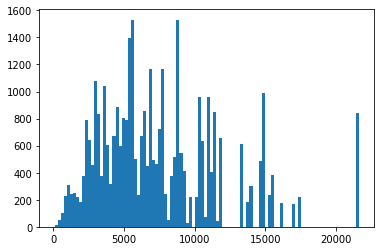

In [697]:
plt.hist(df["Propertycount"], 100);

propertycount_limit = 20000
total_house_above_limit = (df["Propertycount"] > propertycount_limit).sum()
print(f"Total houses have distance more than {propertycount_limit}km: {total_house_above_limit} ({total_house_above_limit / len(df) * 100}%)")

# Solution for missing values (first build the baseline)

- __Suburb__         : 0
- __Address__        : 0
- __Rooms__          : 0
- __Type__           : 0
- __Price__          : 7610  --> Avarage || Drop rows
- __Method__         : 0
- __SellerG__        : 0
- __Date__           : 0
- __Distance__       : 1     --> Avarage (based on what)
- __Postcode__       : 1     --> Median Based on Suburb
- __Bedroom2__       : 8217  --> Average
- __Bathroom__       : 8226  --> Average (based on what)
- __Car__            : 8728  --> Average (based on what)
- __Landsize__       : 11810 --> Drop column first
- __BuildingArea__   : 21115 --> Drop column first
- __YearBuilt__      : 19306 --> Should drop column? Important factor but missed many values
- __CouncilArea__    : 3     --> Average
- __Lattitude__      : 7976  --> Drop column (use coordinates to extract region -> late experiment)
- __Longtitude__     : 7976  --> Drop column (use coordinates to extract region -> late experiment)
- __Regionname__     : 3     --> Drop rows
- __Propertycount__  : 3     --> Drop rows

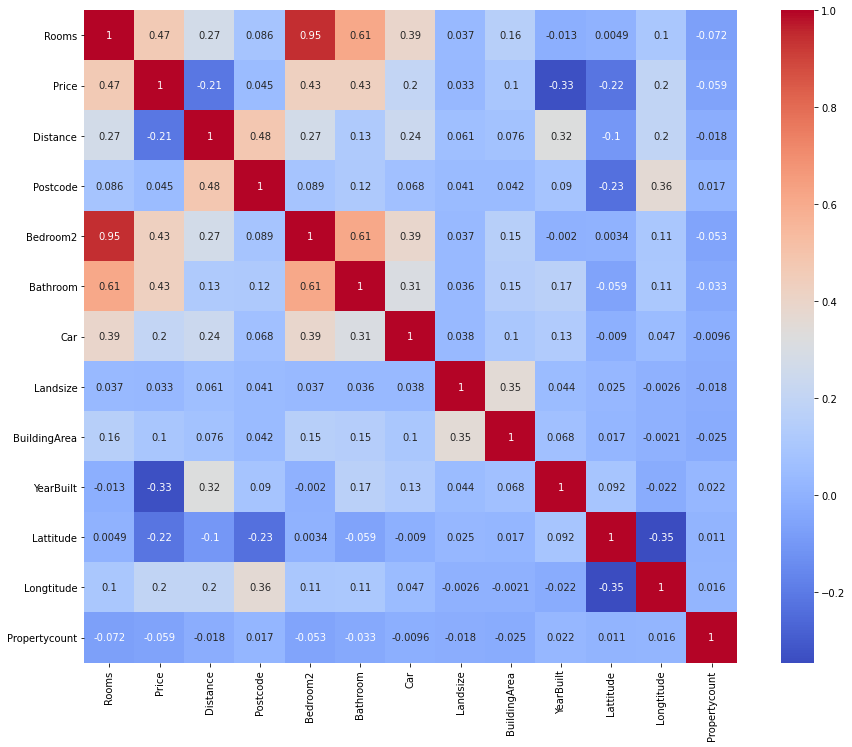

In [698]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, square=True, cmap='coolwarm', ax=ax);

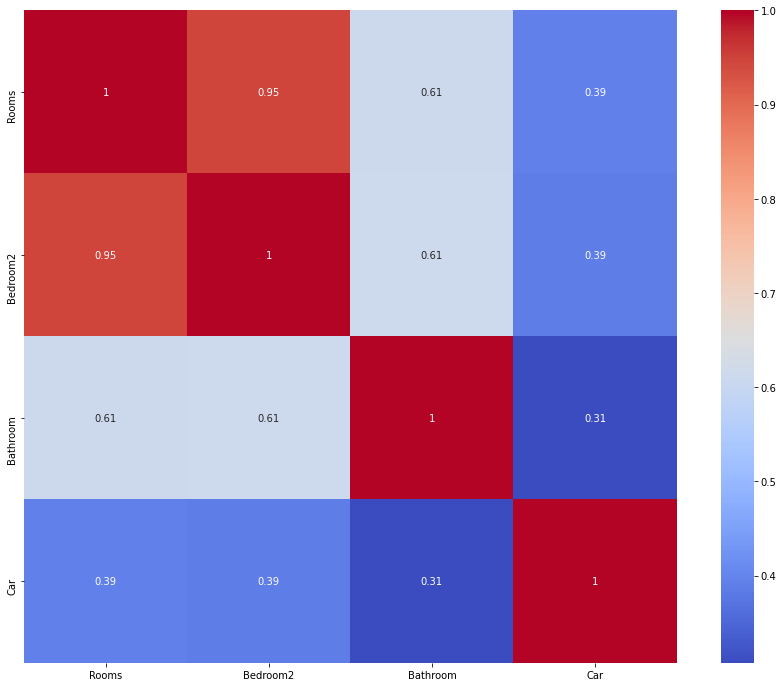

In [699]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
sns.heatmap(df[["Rooms", "Bedroom2", "Bathroom", "Car"]].corr(), annot=True, square=True, cmap="coolwarm", ax=ax);

In [700]:
# Divide the brokers into multiple range
# VIP
# Moderate
# Amateur

# Avg yearbuilt based on suburd + address

# Show correlations and evaluate
# Delve into particular problems
# Apply PCA
# Apply cross validation

In [701]:
# backup the dataframe for the next tries
df = backup_df.copy()
now = datetime.datetime.now()

# feature engineering
# df["YearOld"] = [now.year - int(e[2]) for e in df["Date"].str.split("/")]
# filter noise of land size
df = df[df["Landsize"] <= landsize_limit]
df = df[df["Distance"] <= distance_limit]
df = df[df["Rooms"] <= room_limit]
df = df[df["Bedroom2"] <= bedroom_limit] # still filter for noisy data
df = df[df["Bathroom"] <= bathroom_limit]
df = df[df["Car"] <= car_limit]
df = df[df["Propertycount"] <= propertycount_limit]
# df = df[(df["YearBuilt"] <= 2020) | (df["YearBuilt"].isnull())]
df = df[((df["YearBuilt"] >= year_built_limit[0]) & (df["YearBuilt"] <= year_built_limit[1])) | (df["YearBuilt"].isnull())]

# drop columns
dropped_columns = [
    "BuildingArea",
    "Lattitude",
    "Longtitude",
    "Address", # for experiment
    "Date",
    "SellerG", # for experiment
    "Date",
    "Bedroom2",
    "Suburb", # for experiment
#     "CouncilArea",
]
df = df.drop(dropped_columns, axis=1)

# filter nan
filter_nan_columns = [
    "Regionname",
    "Propertycount",
    "Price",
]
for column in filter_nan_columns:
    df = df[df[column].isnull() == False]

# set avg to column
avg_columns = [
    "Distance",
    "Bathroom",
    "Landsize",
    "Car",
    "YearBuilt"
]
for column in avg_columns:
    if df[column].dtype == np.float64:
        df[column].replace(np.nan, df[column].mean(), inplace=True)

# one hot encoding
one_hot_encoding_columns = [
#     "Suburb",
    "CouncilArea",
    "Type",
    "Method",
    "Regionname",
]
for column in one_hot_encoding_columns:
    df = df.join(pd.get_dummies(df[column], column))
    
df = df.drop(one_hot_encoding_columns, axis=1)

In [702]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [703]:
X = df.drop(["Price"], axis=1)
y = df["Price"]

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [704]:
model = LinearRegression()
model.fit(X_train, y_train);

In [705]:
import pprint

training_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

training_mse_avg = mean_squared_error(model.predict(X_train), y_train) / len(y_train)
test_mse_avg = mean_squared_error(model.predict(X_test), y_test) / len(y_test)

print(f"""
    "bathroom_limit": {bathroom_limit},
    "bedroom_limit": {bedroom_limit},
    "car_limit": {car_limit},
    "distance_limit": {distance_limit},
    "landsize_limit": {landsize_limit},
    "room_limit": {room_limit},
    "year_built_limit": {year_built_limit},
    "dropped_columns": {dropped_columns},
    "filter_nan_columns": {filter_nan_columns},
    "avg_columns": {avg_columns},
    "one_hot_encoding_columns": {one_hot_encoding_columns},
    "training_score": {training_score},
    "training_mse": {training_mse_avg},
    "test_score": {test_score},
    "test_mse": {test_mse_avg},
""")


    "bathroom_limit": 3,
    "bedroom_limit": 5,
    "car_limit": 4,
    "distance_limit": 35,
    "landsize_limit": 2000,
    "room_limit": 5,
    "year_built_limit": [1800, 2020],
    "dropped_columns": ['BuildingArea', 'Lattitude', 'Longtitude', 'Address', 'Date', 'SellerG', 'Date', 'Bedroom2', 'Suburb', 'CouncilArea'],
    "filter_nan_columns": ['Regionname', 'Propertycount', 'Price'],
    "avg_columns": ['Distance', 'Bathroom', 'Landsize', 'Car', 'YearBuilt'],
    "one_hot_encoding_columns": ['Type', 'Method', 'Regionname'],
    "training_score": 0.6218933918816846,
    "training_mse": 11572791.453624846,
    "test_score": 0.5765377622576904,
    "test_mse": 43278136.708658196,



## Experiments (Params and results)

```
----- When drop suburd --> not one hot encoding --> test_mse is tremendously reduced
    "bathroom_limit": 3,
    "bedroom_limit": 5,
    "car_limit": 4,
    "distance_limit": 35,
    "landsize_limit": 2000,
    "room_limit": 5,
    "year_built_limit": [1800, 2020],
    "dropped_columns": ['BuildingArea', 'Lattitude', 'Longtitude', 'Address', 'Date', 'SellerG', 'Date', 'Bedroom2', 'Suburb'],
    "filter_nan_columns": ['Regionname', 'Propertycount', 'Price'],
    "avg_columns": ['Distance', 'Bathroom', 'Landsize', 'Car', 'YearBuilt'],
    "one_hot_encoding_columns": ['Type', 'Method', 'Regionname', 'CouncilArea'],
    "training_score": 0.6618985295025552,
    "training_mse": 10348345.477755982,
    "test_score": 0.6148690793392289,
    "test_mse": 39360649.30831237,
    
----- With landsize
    "bathroom_limit": 3,
    "bedroom_limit": 5,
    "car_limit": 4,
    "distance_limit": 35,
    "landsize_limit": 2000,
    "room_limit": 5,
    "year_built_limit": [1800, 2020],
    "dropped_columns": ['BuildingArea', 'Lattitude', 'Longtitude', 'Address', 'Date', 'SellerG', 'Date', 'Bedroom2'],
    "filter_nan_columns": ['Regionname', 'Propertycount', 'Price'],
    "avg_columns": ['Distance', 'Bathroom', 'Landsize', 'Car', 'YearBuilt'],
    "one_hot_encoding_columns": ['Suburb', 'Type', 'Method', 'Regionname', 'CouncilArea'],
    "training_score": 0.7215606663190579,
    "training_mse": 8522253.43855268,
    "test_score": -3.843173467698076e+20,
    "test_mse": 3.927750148794606e+28,

----- Without bedroom (MSE is lower than with bedroom)
    "bathroom_limit": 3,
    "bedroom_limit": 5,
    "car_limit": 4,
    "distance_limit": 35,
    "landsize_limit": 2000,
    "room_limit": 5,
    "year_built_limit": [1800, 2020],
    "dropped_columns": ['Landsize', 'BuildingArea', 'Lattitude', 'Longtitude', 'Address', 'Date', 'SellerG', 'Date', 'Bedroom2'],
    "filter_nan_columns": ['Regionname', 'Propertycount', 'Price'],
    "avg_columns": ['Distance', 'Bathroom', 'Car', 'YearBuilt'],
    "one_hot_encoding_columns": ['Suburb', 'Type', 'Method', 'Regionname', 'CouncilArea'],
    "training_score": 0.704801975367618,
    "training_mse": 9035190.34907627,
    "test_score": -2.2286497621601668e+20,
    "test_mse": 2.277695635783711e+28,
```

```
----- With bedroom
    "bathroom_limit": 3,
    "bedroom_limit": 5,
    "car_limit": 4,
    "distance_limit": 35,
    "landsize_limit": 2000,
    "room_limit": 5,
    "year_built_limit": [1800, 2020],
    "dropped_columns": ['Landsize', 'BuildingArea', 'Lattitude', 'Longtitude', 'Address', 'Date', 'SellerG', 'Date'],
    "filter_nan_columns": ['Regionname', 'Propertycount', 'Price'],
    "avg_columns": ['Distance', 'Bathroom', 'Bedroom2', 'Car', 'YearBuilt'],
    "one_hot_encoding_columns": ['Suburb', 'Type', 'Method', 'Regionname', 'CouncilArea'],
    "training_score": 0.7051012928802494,
    "training_mse": 9026029.072659181,
    "test_score": -1.2512732164595332e+21,
    "test_mse": 1.2788099739550295e+29,
```

```
----- Clear nan Price (MSE is better than averaging)
    "bathroom_limit": 3,
    "bedroom_limit": 4,
    "car_limit": 4,
    "distance_limit": 35,
    "landsize_limit": 2000,
    "room_limit": 4,
    "dropped_columns": ['Landsize', 'BuildingArea', 'Lattitude', 'Longtitude', 'YearBuilt', 'Address', 'Date', 'SellerG'],
    "filter_nan_columns": ['Regionname', 'Propertycount', 'Price'],
    "avg_columns": ['Distance', 'Bedroom2', 'Bathroom', 'Car', 'CouncilArea'],
    "one_hot_encoding_columns": ['Suburb', 'Type', 'Method', 'Regionname', 'CouncilArea'],
    "training_score": 0.6906554844989757,
    "training_mse": 8444398.947926186,
    "test_score": -6.389756999818528e+21,
    "test_mse": 6.144681940636663e+29,
```

```
---- Avg nan Price
    "bathroom_limit": 3,
    "bedroom_limit": 5,
    "car_limit": 4,
    "distance_limit": 35,
    "landsize_limit": 2000,
    "room_limit": 5,
    "dropped_columns": ['Landsize', 'BuildingArea', 'Lattitude', 'Longtitude', 'YearBuilt', 'Address', 'Date', 'SellerG'],
    "filter_nan_columns": ['Regionname', 'Propertycount'],
    "avg_columns": ['Distance', 'Bedroom2', 'Bathroom', 'Car', 'CouncilArea', 'Price'],
    "one_hot_encoding_columns": ['Suburb', 'Type', 'Method', 'Regionname', 'CouncilArea'],
    "training_score": 0.5029821989872905,
    "training_mse": 9232753.993382506,
    "test_score": -1.8769615986582075e+22,
    "test_mse": 1.052477666779017e+30,
```

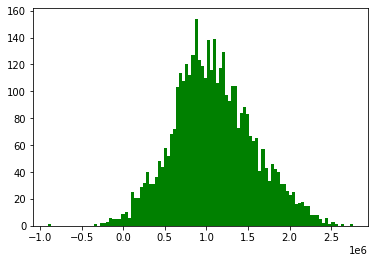

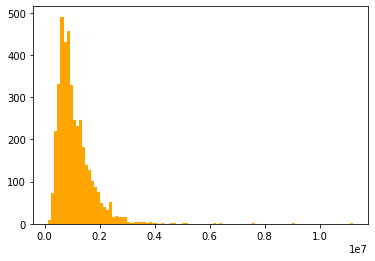

In [706]:
plt.hist(model.predict(X_test), 100, color="green")
plt.show();

plt.hist(y_test.values, 100, color="orange")
plt.show();

In [707]:
test = model.predict(X_test)
test[test < 0]

array([-149504., -152576., -222208., -182272., -274432.,  -48128.,
       -194560.,  -73728., -126976., -126976., -256000.,  -19456.,
       -112640.,  -40960., -163840., -163840.,  -49152.,  -72704.,
       -118784.,  -88064.,  -43008.,   -9216.,  -61440., -118784.,
       -229376.,  -26624., -319488., -185344.,   -4096., -144384.,
       -149504.,   -3072., -898048.,  -84992.])

In [708]:
y_test,model.predict(X_test)

(5970     1331000.0
 20023    2675000.0
 20160    1150000.0
 3891     1122000.0
 14864     600000.0
            ...    
 8239     1127000.0
 20154    1550000.0
 27113     757500.0
 21054    1441000.0
 29537    1245000.0
 Name: Price, Length: 4082, dtype: float64,
 array([1499136., 1781760., 1892352., ...,  674816., 1274880.,  889856.]))

In [709]:
# 0.4933872158018002
# 0.4933726065141658
import datetime
now = datetime.datetime.now()
now.year

2021

In [710]:
print("Test score:", model.score(X_test, y_test))

Test score: 0.5765377622576904
